In [1]:
# Correlation Analysis: Lung Cancer vs Smoking & Health Indicators vs Alcohol Consumption

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from pathlib import Path

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Loading datasets for correlation analysis...")

DATASET_DIR = Path("dataset")


Loading datasets for correlation analysis...


In [2]:
# Load all required datasets
try:
    # Smoking data
    smoking_adults_df = pd.read_csv(DATASET_DIR / 'ddf--datapoints--smoking_adults_percent_of_population_over_age_15--by--geo--time.csv')
    smoking_men_df = pd.read_csv(DATASET_DIR / 'ddf--datapoints--smoking_men_percent_of_men_over_age_15--by--geo--time.csv')
    smoking_women_df = pd.read_csv(DATASET_DIR / 'ddf--datapoints--smoking_women_percent_of_women_over_age_15--by--geo--time.csv')
    
    # Lung cancer data
    lung_cancer_men_df = pd.read_csv(DATASET_DIR / 'ddf--datapoints--lung_cancer_new_cases_per_100000_men--by--geo--time.csv')
    lung_cancer_women_df = pd.read_csv(DATASET_DIR / 'ddf--datapoints--lung_cancer_new_cases_per_100000_women--by--geo--time.csv')
    
    # Alcohol consumption
    alcohol_df = pd.read_csv(DATASET_DIR / 'ddf--datapoints--alcohol_consumption_per_adult_15plus_litres--by--geo--time.csv')
    
    # BMI data
    bmi_men_df = pd.read_csv(DATASET_DIR / 'ddf--datapoints--body_mass_index_bmi_men_kgperm2--by--geo--time.csv')
    bmi_women_df = pd.read_csv(DATASET_DIR / 'ddf--datapoints--body_mass_index_bmi_women_kgperm2--by--geo--time.csv')
    
    # Cholesterol data
    cholesterol_men_df = pd.read_csv(DATASET_DIR / 'ddf--datapoints--cholesterol_fat_in_blood_men_mmolperl--by--geo--time.csv')
    cholesterol_women_df = pd.read_csv(DATASET_DIR / 'ddf--datapoints--cholesterol_fat_in_blood_women_mmolperl--by--geo--time.csv')
    
    # Cancer data
    liver_cancer_men_df = pd.read_csv(DATASET_DIR / 'ddf--datapoints--liver_cancer_new_cases_per_100000_men--by--geo--time.csv')
    liver_cancer_women_df = pd.read_csv(DATASET_DIR / 'ddf--datapoints--liver_cancer_new_cases_per_100000_women--by--geo--time.csv')
    prostate_cancer_df = pd.read_csv(DATASET_DIR / 'ddf--datapoints--prostate_cancer_new_cases_per_100000_men--by--geo--time.csv')
    stomach_cancer_men_df = pd.read_csv(DATASET_DIR / 'ddf--datapoints--stomach_cancer_new_cases_per_100000_men--by--geo--time.csv')
    stomach_cancer_women_df = pd.read_csv(DATASET_DIR / 'ddf--datapoints--stomach_cancer_new_cases_per_100000_women--by--geo--time.csv')
    breast_cancer_df = pd.read_csv(DATASET_DIR / 'ddf--datapoints--breast_cancer_new_cases_per_100000_women--by--geo--time.csv')
    
    print("✅ All datasets loaded successfully!")
    print(f"Smoking adults: {smoking_adults_df.shape}")
    print(f"Lung cancer men: {lung_cancer_men_df.shape}")
    print(f"Lung cancer women: {lung_cancer_women_df.shape}")
    print(f"Alcohol: {alcohol_df.shape}")
    print(f"BMI men: {bmi_men_df.shape}")
    print(f"BMI women: {bmi_women_df.shape}")
    
except FileNotFoundError as e:
    print(f"❌ Error loading files: {e}")
    print("Please ensure all CSV files are in the 'dataset' directory")


✅ All datasets loaded successfully!
Smoking adults: (1650, 3)
Lung cancer men: (6936, 3)
Lung cancer women: (6936, 3)
Alcohol: (409, 3)
BMI men: (8022, 3)
BMI women: (8022, 3)


## 1. Correlation Analysis: Lung Cancer vs Smoking


In [3]:
def merge_and_correlate(df1, df2, val1_col, val2_col, name1, name2):
    """Merge two datasets and calculate correlation"""
    # Merge on geo and time
    merged = df1.merge(df2, on=['geo', 'time'], how='inner')
    
    # Remove missing values
    merged_clean = merged.dropna(subset=[val1_col, val2_col])
    
    if len(merged_clean) < 10:
        return None, None, None, 0
    
    # Calculate correlations
    pearson_corr = pearsonr(merged_clean[val1_col], merged_clean[val2_col])
    spearman_corr = spearmanr(merged_clean[val1_col], merged_clean[val2_col])
    
    return merged_clean, pearson_corr, spearman_corr, len(merged_clean)

print("🔬 CORRELATION ANALYSIS: LUNG CANCER vs SMOKING")
print("=" * 70)

# Lung Cancer Men vs Smoking Men
merged_lung_men_smoke_men, pearson_lm_sm, spearman_lm_sm, n_lm_sm = merge_and_correlate(
    lung_cancer_men_df, smoking_men_df,
    'lung_cancer_new_cases_per_100000_men', 'smoking_men_percent_of_men_over_age_15',
    'Lung Cancer Men', 'Smoking Men'
)

print(f"\n1️⃣ LUNG CANCER (MEN) vs SMOKING (MEN)")
print(f"   Data points: {n_lm_sm}")
if pearson_lm_sm:
    print(f"   Pearson correlation:  {pearson_lm_sm[0]:7.4f} (p = {pearson_lm_sm[1]:.4f})")
    print(f"   Spearman correlation: {spearman_lm_sm[0]:7.4f} (p = {spearman_lm_sm[1]:.4f})")

# Lung Cancer Women vs Smoking Women
merged_lung_women_smoke_women, pearson_lw_sw, spearman_lw_sw, n_lw_sw = merge_and_correlate(
    lung_cancer_women_df, smoking_women_df,
    'lung_cancer_new_cases_per_100000_women', 'smoking_women_percent_of_women_over_age_15',
    'Lung Cancer Women', 'Smoking Women'
)

print(f"\n2️⃣ LUNG CANCER (WOMEN) vs SMOKING (WOMEN)")
print(f"   Data points: {n_lw_sw}")
if pearson_lw_sw:
    print(f"   Pearson correlation:  {pearson_lw_sw[0]:7.4f} (p = {pearson_lw_sw[1]:.4f})")
    print(f"   Spearman correlation: {spearman_lw_sw[0]:7.4f} (p = {spearman_lw_sw[1]:.4f})")

# Combined lung cancer (average of men and women) vs smoking adults
lung_combined = lung_cancer_men_df.merge(
    lung_cancer_women_df, on=['geo', 'time'], suffixes=('_men', '_women'), how='outer'
)
lung_combined['lung_cancer_avg'] = lung_combined[
    ['lung_cancer_new_cases_per_100000_men', 'lung_cancer_new_cases_per_100000_women']
].mean(axis=1)

merged_lung_combined_smoke, pearson_lc_sa, spearman_lc_sa, n_lc_sa = merge_and_correlate(
    lung_combined[['geo', 'time', 'lung_cancer_avg']], smoking_adults_df,
    'lung_cancer_avg', 'smoking_adults_percent_of_population_over_age_15',
    'Lung Cancer Combined', 'Smoking Adults'
)

print(f"\n3️⃣ LUNG CANCER (COMBINED) vs SMOKING (ADULTS)")
print(f"   Data points: {n_lc_sa}")
if pearson_lc_sa:
    print(f"   Pearson correlation:  {pearson_lc_sa[0]:7.4f} (p = {pearson_lc_sa[1]:.4f})")
    print(f"   Spearman correlation: {spearman_lc_sa[0]:7.4f} (p = {spearman_lc_sa[1]:.4f})")


🔬 CORRELATION ANALYSIS: LUNG CANCER vs SMOKING

1️⃣ LUNG CANCER (MEN) vs SMOKING (MEN)
   Data points: 1320
   Pearson correlation:   0.3584 (p = 0.0000)
   Spearman correlation:  0.4210 (p = 0.0000)

2️⃣ LUNG CANCER (WOMEN) vs SMOKING (WOMEN)
   Data points: 1320
   Pearson correlation:   0.4477 (p = 0.0000)
   Spearman correlation:  0.5162 (p = 0.0000)

3️⃣ LUNG CANCER (COMBINED) vs SMOKING (ADULTS)
   Data points: 1320
   Pearson correlation:   0.4832 (p = 0.0000)
   Spearman correlation:  0.5376 (p = 0.0000)


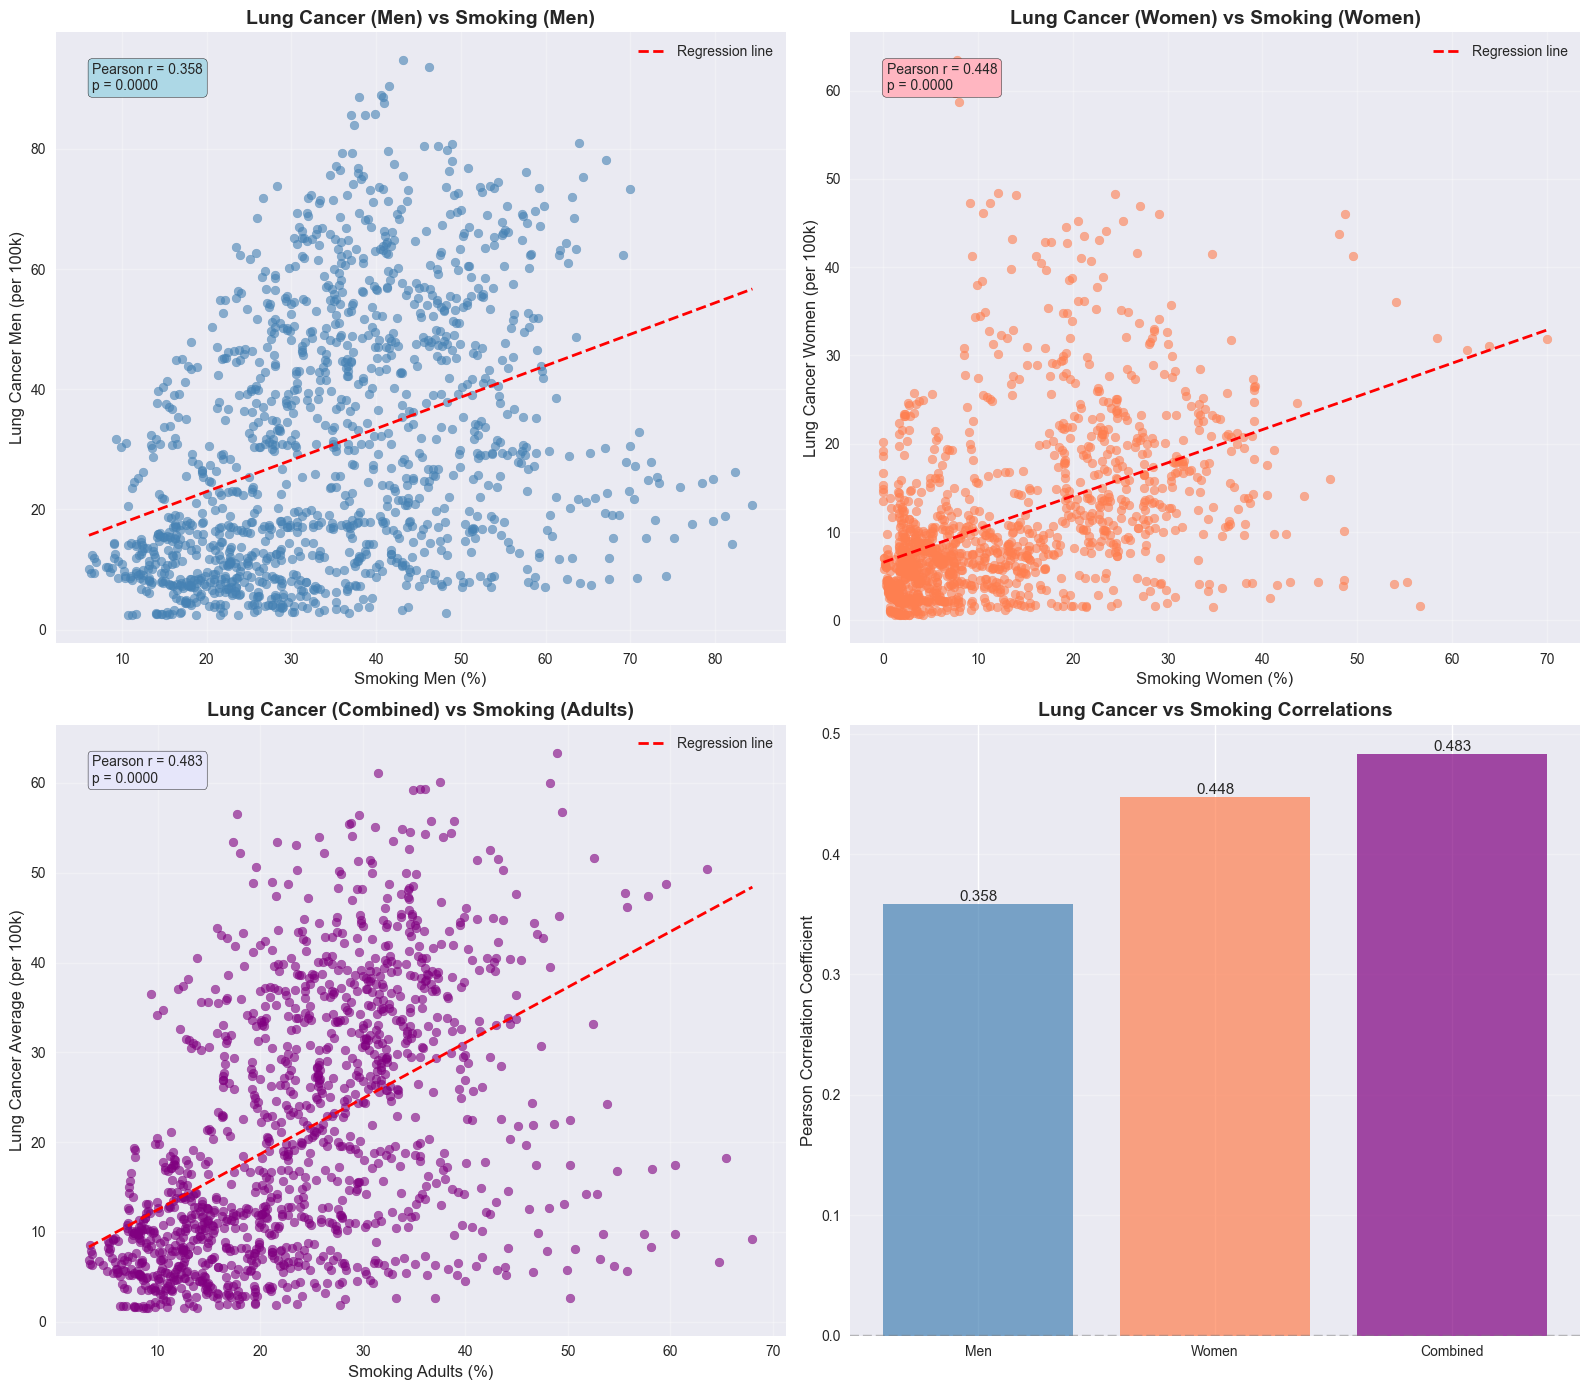

In [4]:
# Visualization: Lung Cancer vs Smoking
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Plot 1: Lung Cancer Men vs Smoking Men
if merged_lung_men_smoke_men is not None and len(merged_lung_men_smoke_men) > 0:
    ax1 = axes[0, 0]
    ax1.scatter(merged_lung_men_smoke_men['smoking_men_percent_of_men_over_age_15'], 
               merged_lung_men_smoke_men['lung_cancer_new_cases_per_100000_men'], 
               alpha=0.6, s=40, color='steelblue')
    
    # Add regression line
    z = np.polyfit(merged_lung_men_smoke_men['smoking_men_percent_of_men_over_age_15'], 
                   merged_lung_men_smoke_men['lung_cancer_new_cases_per_100000_men'], 1)
    p = np.poly1d(z)
    ax1.plot(merged_lung_men_smoke_men['smoking_men_percent_of_men_over_age_15'].sort_values(), 
             p(merged_lung_men_smoke_men['smoking_men_percent_of_men_over_age_15'].sort_values()), 
             "r--", linewidth=2, label='Regression line')
    
    ax1.set_xlabel('Smoking Men (%)', fontsize=12)
    ax1.set_ylabel('Lung Cancer Men (per 100k)', fontsize=12)
    ax1.set_title('Lung Cancer (Men) vs Smoking (Men)', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    if pearson_lm_sm:
        corr_text = f"Pearson r = {pearson_lm_sm[0]:.3f}\np = {pearson_lm_sm[1]:.4f}"
        ax1.text(0.05, 0.95, corr_text, transform=ax1.transAxes, 
                 bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"), 
                 verticalalignment='top')

# Plot 2: Lung Cancer Women vs Smoking Women
if merged_lung_women_smoke_women is not None and len(merged_lung_women_smoke_women) > 0:
    ax2 = axes[0, 1]
    ax2.scatter(merged_lung_women_smoke_women['smoking_women_percent_of_women_over_age_15'], 
               merged_lung_women_smoke_women['lung_cancer_new_cases_per_100000_women'], 
               alpha=0.6, s=40, color='coral')
    
    # Add regression line
    z = np.polyfit(merged_lung_women_smoke_women['smoking_women_percent_of_women_over_age_15'], 
                   merged_lung_women_smoke_women['lung_cancer_new_cases_per_100000_women'], 1)
    p = np.poly1d(z)
    ax2.plot(merged_lung_women_smoke_women['smoking_women_percent_of_women_over_age_15'].sort_values(), 
             p(merged_lung_women_smoke_women['smoking_women_percent_of_women_over_age_15'].sort_values()), 
             "r--", linewidth=2, label='Regression line')
    
    ax2.set_xlabel('Smoking Women (%)', fontsize=12)
    ax2.set_ylabel('Lung Cancer Women (per 100k)', fontsize=12)
    ax2.set_title('Lung Cancer (Women) vs Smoking (Women)', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    if pearson_lw_sw:
        corr_text = f"Pearson r = {pearson_lw_sw[0]:.3f}\np = {pearson_lw_sw[1]:.4f}"
        ax2.text(0.05, 0.95, corr_text, transform=ax2.transAxes, 
                 bbox=dict(boxstyle="round,pad=0.3", facecolor="lightpink"), 
                 verticalalignment='top')

# Plot 3: Lung Cancer Combined vs Smoking Adults
if merged_lung_combined_smoke is not None and len(merged_lung_combined_smoke) > 0:
    ax3 = axes[1, 0]
    ax3.scatter(merged_lung_combined_smoke['smoking_adults_percent_of_population_over_age_15'], 
               merged_lung_combined_smoke['lung_cancer_avg'], 
               alpha=0.6, s=40, color='purple')
    
    # Add regression line
    z = np.polyfit(merged_lung_combined_smoke['smoking_adults_percent_of_population_over_age_15'], 
                   merged_lung_combined_smoke['lung_cancer_avg'], 1)
    p = np.poly1d(z)
    ax3.plot(merged_lung_combined_smoke['smoking_adults_percent_of_population_over_age_15'].sort_values(), 
             p(merged_lung_combined_smoke['smoking_adults_percent_of_population_over_age_15'].sort_values()), 
             "r--", linewidth=2, label='Regression line')
    
    ax3.set_xlabel('Smoking Adults (%)', fontsize=12)
    ax3.set_ylabel('Lung Cancer Average (per 100k)', fontsize=12)
    ax3.set_title('Lung Cancer (Combined) vs Smoking (Adults)', fontsize=14, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    
    if pearson_lc_sa:
        corr_text = f"Pearson r = {pearson_lc_sa[0]:.3f}\np = {pearson_lc_sa[1]:.4f}"
        ax3.text(0.05, 0.95, corr_text, transform=ax3.transAxes, 
                 bbox=dict(boxstyle="round,pad=0.3", facecolor="lavender"), 
                 verticalalignment='top')

# Plot 4: Correlation summary bar chart
ax4 = axes[1, 1]
correlations_lung = []
labels_lung = []

if pearson_lm_sm:
    correlations_lung.append(pearson_lm_sm[0])
    labels_lung.append('Men')
if pearson_lw_sw:
    correlations_lung.append(pearson_lw_sw[0])
    labels_lung.append('Women')
if pearson_lc_sa:
    correlations_lung.append(pearson_lc_sa[0])
    labels_lung.append('Combined')

if correlations_lung:
    colors_lung = ['steelblue', 'coral', 'purple'][:len(correlations_lung)]
    bars = ax4.bar(labels_lung, correlations_lung, color=colors_lung, alpha=0.7)
    ax4.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    ax4.set_ylabel('Pearson Correlation Coefficient', fontsize=12)
    ax4.set_title('Lung Cancer vs Smoking Correlations', fontsize=14, fontweight='bold')
    ax4.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar, corr in zip(bars, correlations_lung):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{corr:.3f}', ha='center', va='bottom' if height > 0 else 'top', fontsize=11)

plt.tight_layout()
plt.show()


In [5]:
print("🔬 CORRELATION ANALYSIS: HEALTH INDICATORS vs ALCOHOL CONSUMPTION")
print("=" * 70)

# BMI Men vs Alcohol
merged_bmi_men_alcohol, pearson_bmi_men_alc, spearman_bmi_men_alc, n_bmi_men_alc = merge_and_correlate(
    bmi_men_df, alcohol_df,
    'body_mass_index_bmi_men_kgperm2', 'alcohol_consumption_per_adult_15plus_litres',
    'BMI Men', 'Alcohol'
)

print(f"\n1️⃣ BMI (MEN) vs ALCOHOL CONSUMPTION")
print(f"   Data points: {n_bmi_men_alc}")
if pearson_bmi_men_alc:
    print(f"   Pearson correlation:  {pearson_bmi_men_alc[0]:7.4f} (p = {pearson_bmi_men_alc[1]:.4f})")
    print(f"   Spearman correlation: {spearman_bmi_men_alc[0]:7.4f} (p = {spearman_bmi_men_alc[1]:.4f})")

# BMI Women vs Alcohol
merged_bmi_women_alcohol, pearson_bmi_women_alc, spearman_bmi_women_alc, n_bmi_women_alc = merge_and_correlate(
    bmi_women_df, alcohol_df,
    'body_mass_index_bmi_women_kgperm2', 'alcohol_consumption_per_adult_15plus_litres',
    'BMI Women', 'Alcohol'
)

print(f"\n2️⃣ BMI (WOMEN) vs ALCOHOL CONSUMPTION")
print(f"   Data points: {n_bmi_women_alc}")
if pearson_bmi_women_alc:
    print(f"   Pearson correlation:  {pearson_bmi_women_alc[0]:7.4f} (p = {pearson_bmi_women_alc[1]:.4f})")
    print(f"   Spearman correlation: {spearman_bmi_women_alc[0]:7.4f} (p = {spearman_bmi_women_alc[1]:.4f})")

# Cholesterol Men vs Alcohol
merged_chol_men_alcohol, pearson_chol_men_alc, spearman_chol_men_alc, n_chol_men_alc = merge_and_correlate(
    cholesterol_men_df, alcohol_df,
    'cholesterol_fat_in_blood_men_mmolperl', 'alcohol_consumption_per_adult_15plus_litres',
    'Cholesterol Men', 'Alcohol'
)

print(f"\n3️⃣ CHOLESTEROL (MEN) vs ALCOHOL CONSUMPTION")
print(f"   Data points: {n_chol_men_alc}")
if pearson_chol_men_alc:
    print(f"   Pearson correlation:  {pearson_chol_men_alc[0]:7.4f} (p = {pearson_chol_men_alc[1]:.4f})")
    print(f"   Spearman correlation: {spearman_chol_men_alc[0]:7.4f} (p = {spearman_chol_men_alc[1]:.4f})")

# Cholesterol Women vs Alcohol
merged_chol_women_alcohol, pearson_chol_women_alc, spearman_chol_women_alc, n_chol_women_alc = merge_and_correlate(
    cholesterol_women_df, alcohol_df,
    'cholesterol_fat_in_blood_women_mmolperl', 'alcohol_consumption_per_adult_15plus_litres',
    'Cholesterol Women', 'Alcohol'
)

print(f"\n4️⃣ CHOLESTEROL (WOMEN) vs ALCOHOL CONSUMPTION")
print(f"   Data points: {n_chol_women_alc}")
if pearson_chol_women_alc:
    print(f"   Pearson correlation:  {pearson_chol_women_alc[0]:7.4f} (p = {pearson_chol_women_alc[1]:.4f})")
    print(f"   Spearman correlation: {spearman_chol_women_alc[0]:7.4f} (p = {spearman_chol_women_alc[1]:.4f})")

# Liver Cancer Men vs Alcohol
merged_liver_men_alcohol, pearson_liver_men_alc, spearman_liver_men_alc, n_liver_men_alc = merge_and_correlate(
    liver_cancer_men_df, alcohol_df,
    'liver_cancer_new_cases_per_100000_men', 'alcohol_consumption_per_adult_15plus_litres',
    'Liver Cancer Men', 'Alcohol'
)

print(f"\n5️⃣ LIVER CANCER (MEN) vs ALCOHOL CONSUMPTION")
print(f"   Data points: {n_liver_men_alc}")
if pearson_liver_men_alc:
    print(f"   Pearson correlation:  {pearson_liver_men_alc[0]:7.4f} (p = {pearson_liver_men_alc[1]:.4f})")
    print(f"   Spearman correlation: {spearman_liver_men_alc[0]:7.4f} (p = {spearman_liver_men_alc[1]:.4f})")

# Liver Cancer Women vs Alcohol
merged_liver_women_alcohol, pearson_liver_women_alc, spearman_liver_women_alc, n_liver_women_alc = merge_and_correlate(
    liver_cancer_women_df, alcohol_df,
    'liver_cancer_new_cases_per_100000_women', 'alcohol_consumption_per_adult_15plus_litres',
    'Liver Cancer Women', 'Alcohol'
)

print(f"\n6️⃣ LIVER CANCER (WOMEN) vs ALCOHOL CONSUMPTION")
print(f"   Data points: {n_liver_women_alc}")
if pearson_liver_women_alc:
    print(f"   Pearson correlation:  {pearson_liver_women_alc[0]:7.4f} (p = {pearson_liver_women_alc[1]:.4f})")
    print(f"   Spearman correlation: {spearman_liver_women_alc[0]:7.4f} (p = {spearman_liver_women_alc[1]:.4f})")

# Prostate Cancer vs Alcohol
merged_prostate_alcohol, pearson_prostate_alc, spearman_prostate_alc, n_prostate_alc = merge_and_correlate(
    prostate_cancer_df, alcohol_df,
    'prostate_cancer_new_cases_per_100000_men', 'alcohol_consumption_per_adult_15plus_litres',
    'Prostate Cancer', 'Alcohol'
)

print(f"\n7️⃣ PROSTATE CANCER vs ALCOHOL CONSUMPTION")
print(f"   Data points: {n_prostate_alc}")
if pearson_prostate_alc:
    print(f"   Pearson correlation:  {pearson_prostate_alc[0]:7.4f} (p = {pearson_prostate_alc[1]:.4f})")
    print(f"   Spearman correlation: {spearman_prostate_alc[0]:7.4f} (p = {spearman_prostate_alc[1]:.4f})")

# Stomach Cancer Men vs Alcohol
merged_stomach_men_alcohol, pearson_stomach_men_alc, spearman_stomach_men_alc, n_stomach_men_alc = merge_and_correlate(
    stomach_cancer_men_df, alcohol_df,
    'stomach_cancer_new_cases_per_100000_men', 'alcohol_consumption_per_adult_15plus_litres',
    'Stomach Cancer Men', 'Alcohol'
)

print(f"\n8️⃣ STOMACH CANCER (MEN) vs ALCOHOL CONSUMPTION")
print(f"   Data points: {n_stomach_men_alc}")
if pearson_stomach_men_alc:
    print(f"   Pearson correlation:  {pearson_stomach_men_alc[0]:7.4f} (p = {pearson_stomach_men_alc[1]:.4f})")
    print(f"   Spearman correlation: {spearman_stomach_men_alc[0]:7.4f} (p = {spearman_stomach_men_alc[1]:.4f})")

# Stomach Cancer Women vs Alcohol
merged_stomach_women_alcohol, pearson_stomach_women_alc, spearman_stomach_women_alc, n_stomach_women_alc = merge_and_correlate(
    stomach_cancer_women_df, alcohol_df,
    'stomach_cancer_new_cases_per_100000_women', 'alcohol_consumption_per_adult_15plus_litres',
    'Stomach Cancer Women', 'Alcohol'
)

print(f"\n9️⃣ STOMACH CANCER (WOMEN) vs ALCOHOL CONSUMPTION")
print(f"   Data points: {n_stomach_women_alc}")
if pearson_stomach_women_alc:
    print(f"   Pearson correlation:  {pearson_stomach_women_alc[0]:7.4f} (p = {pearson_stomach_women_alc[1]:.4f})")
    print(f"   Spearman correlation: {spearman_stomach_women_alc[0]:7.4f} (p = {spearman_stomach_women_alc[1]:.4f})")

# Breast Cancer vs Alcohol
merged_breast_alcohol, pearson_breast_alc, spearman_breast_alc, n_breast_alc = merge_and_correlate(
    breast_cancer_df, alcohol_df,
    'breast_cancer_new_cases_per_100000_women', 'alcohol_consumption_per_adult_15plus_litres',
    'Breast Cancer', 'Alcohol'
)

print(f"\n🔟 BREAST CANCER vs ALCOHOL CONSUMPTION")
print(f"   Data points: {n_breast_alc}")
if pearson_breast_alc:
    print(f"   Pearson correlation:  {pearson_breast_alc[0]:7.4f} (p = {pearson_breast_alc[1]:.4f})")
    print(f"   Spearman correlation: {spearman_breast_alc[0]:7.4f} (p = {spearman_breast_alc[1]:.4f})")


🔬 CORRELATION ANALYSIS: HEALTH INDICATORS vs ALCOHOL CONSUMPTION

1️⃣ BMI (MEN) vs ALCOHOL CONSUMPTION
   Data points: 408
   Pearson correlation:   0.3336 (p = 0.0000)
   Spearman correlation:  0.3762 (p = 0.0000)

2️⃣ BMI (WOMEN) vs ALCOHOL CONSUMPTION
   Data points: 408
   Pearson correlation:   0.1961 (p = 0.0001)
   Spearman correlation:  0.2444 (p = 0.0000)

3️⃣ CHOLESTEROL (MEN) vs ALCOHOL CONSUMPTION
   Data points: 408
   Pearson correlation:   0.5266 (p = 0.0000)
   Spearman correlation:  0.5357 (p = 0.0000)

4️⃣ CHOLESTEROL (WOMEN) vs ALCOHOL CONSUMPTION
   Data points: 408
   Pearson correlation:   0.5690 (p = 0.0000)
   Spearman correlation:  0.5602 (p = 0.0000)

5️⃣ LIVER CANCER (MEN) vs ALCOHOL CONSUMPTION
   Data points: 404
   Pearson correlation:  -0.1456 (p = 0.0033)
   Spearman correlation: -0.1445 (p = 0.0036)

6️⃣ LIVER CANCER (WOMEN) vs ALCOHOL CONSUMPTION
   Data points: 404
   Pearson correlation:  -0.1775 (p = 0.0003)
   Spearman correlation: -0.2972 (p = 0.0

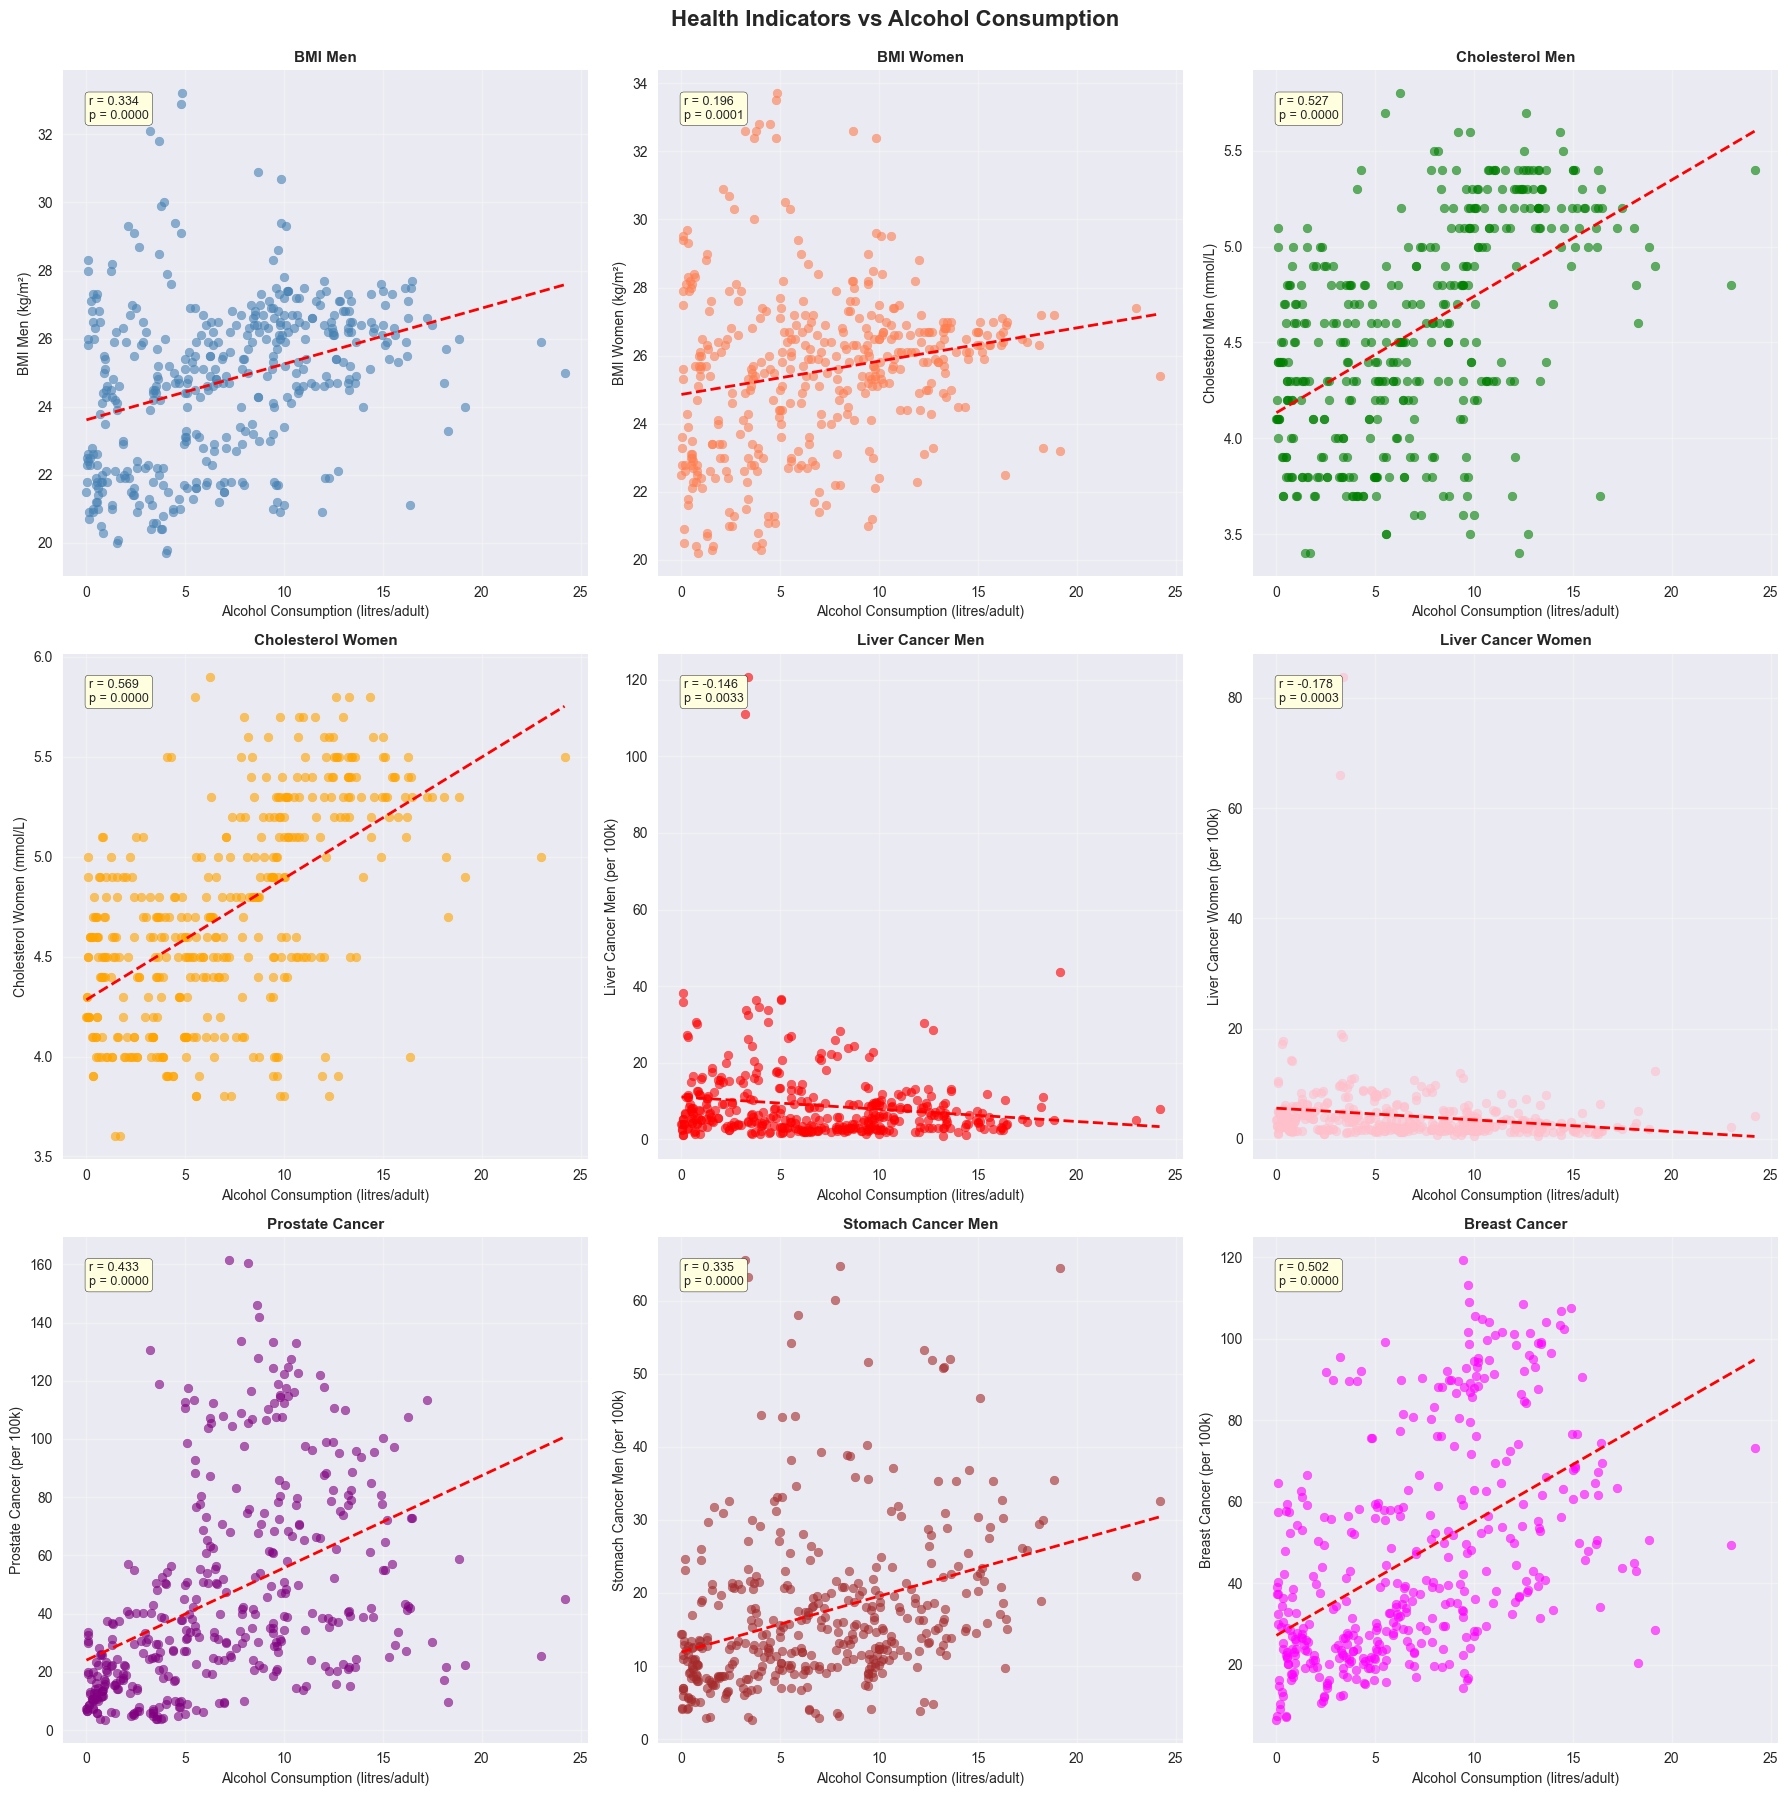

In [6]:
# Visualization: Health Indicators vs Alcohol Consumption
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

plots_data = [
    (merged_bmi_men_alcohol, 'body_mass_index_bmi_men_kgperm2', 'BMI Men (kg/m²)', pearson_bmi_men_alc, 0, 0, 'steelblue'),
    (merged_bmi_women_alcohol, 'body_mass_index_bmi_women_kgperm2', 'BMI Women (kg/m²)', pearson_bmi_women_alc, 0, 1, 'coral'),
    (merged_chol_men_alcohol, 'cholesterol_fat_in_blood_men_mmolperl', 'Cholesterol Men (mmol/L)', pearson_chol_men_alc, 0, 2, 'green'),
    (merged_chol_women_alcohol, 'cholesterol_fat_in_blood_women_mmolperl', 'Cholesterol Women (mmol/L)', pearson_chol_women_alc, 1, 0, 'orange'),
    (merged_liver_men_alcohol, 'liver_cancer_new_cases_per_100000_men', 'Liver Cancer Men (per 100k)', pearson_liver_men_alc, 1, 1, 'red'),
    (merged_liver_women_alcohol, 'liver_cancer_new_cases_per_100000_women', 'Liver Cancer Women (per 100k)', pearson_liver_women_alc, 1, 2, 'pink'),
    (merged_prostate_alcohol, 'prostate_cancer_new_cases_per_100000_men', 'Prostate Cancer (per 100k)', pearson_prostate_alc, 2, 0, 'purple'),
    (merged_stomach_men_alcohol, 'stomach_cancer_new_cases_per_100000_men', 'Stomach Cancer Men (per 100k)', pearson_stomach_men_alc, 2, 1, 'brown'),
    (merged_breast_alcohol, 'breast_cancer_new_cases_per_100000_women', 'Breast Cancer (per 100k)', pearson_breast_alc, 2, 2, 'magenta'),
]

for merged_data, value_col, ylabel, corr_result, row, col, color in plots_data:
    ax = axes[row, col]
    
    if merged_data is not None and len(merged_data) > 0:
        ax.scatter(merged_data['alcohol_consumption_per_adult_15plus_litres'], 
                  merged_data[value_col], 
                  alpha=0.6, s=40, color=color)
        
        # Add regression line
        z = np.polyfit(merged_data['alcohol_consumption_per_adult_15plus_litres'], 
                      merged_data[value_col], 1)
        p = np.poly1d(z)
        ax.plot(merged_data['alcohol_consumption_per_adult_15plus_litres'].sort_values(), 
               p(merged_data['alcohol_consumption_per_adult_15plus_litres'].sort_values()), 
               "r--", linewidth=2)
        
        ax.set_xlabel('Alcohol Consumption (litres/adult)', fontsize=10)
        ax.set_ylabel(ylabel, fontsize=10)
        ax.set_title(ylabel.split('(')[0].strip(), fontsize=11, fontweight='bold')
        ax.grid(True, alpha=0.3)
        
        if corr_result:
            corr_text = f"r = {corr_result[0]:.3f}\np = {corr_result[1]:.4f}"
            ax.text(0.05, 0.95, corr_text, transform=ax.transAxes, 
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"), 
                   verticalalignment='top', fontsize=9)
    else:
        ax.text(0.5, 0.5, 'Insufficient data', ha='center', va='center', transform=ax.transAxes)
        ax.set_title(ylabel.split('(')[0].strip(), fontsize=11, fontweight='bold')

plt.suptitle('Health Indicators vs Alcohol Consumption', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


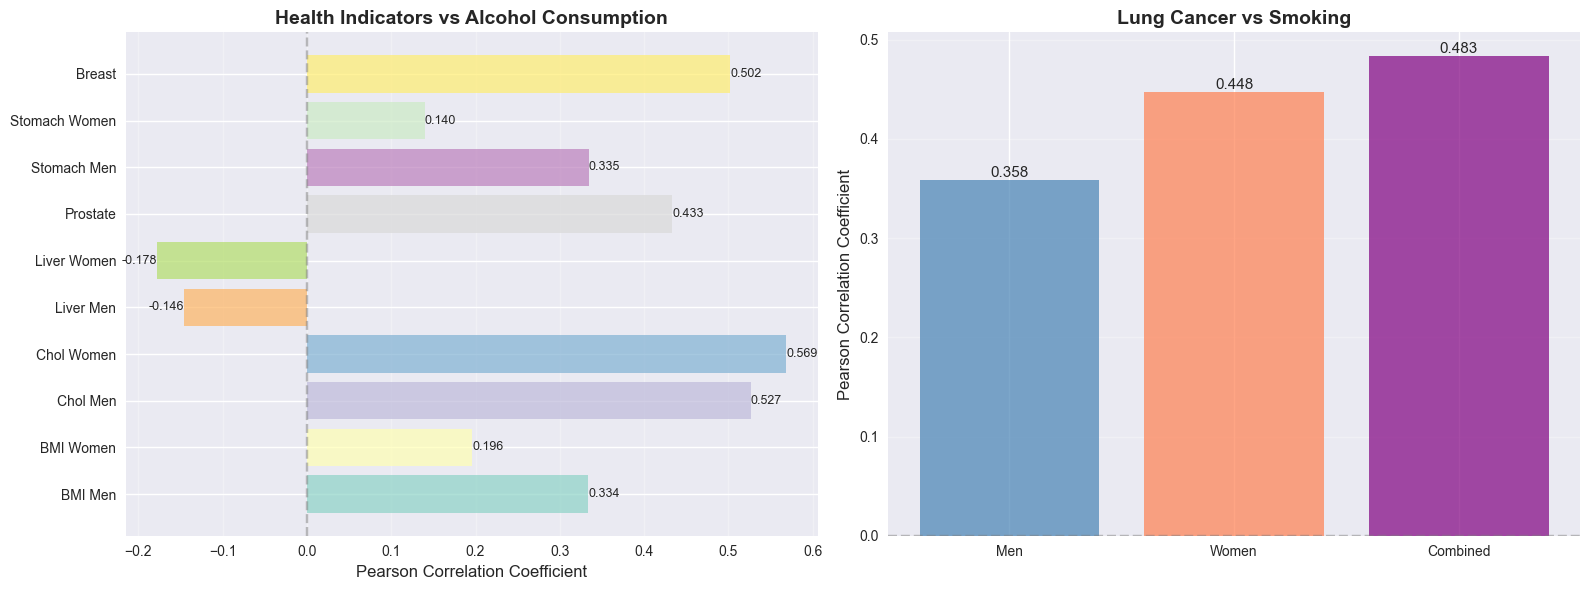

In [7]:
# Summary correlation bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Alcohol correlations
alcohol_correlations = []
alcohol_labels = []

if pearson_bmi_men_alc:
    alcohol_correlations.append(pearson_bmi_men_alc[0])
    alcohol_labels.append('BMI Men')
if pearson_bmi_women_alc:
    alcohol_correlations.append(pearson_bmi_women_alc[0])
    alcohol_labels.append('BMI Women')
if pearson_chol_men_alc:
    alcohol_correlations.append(pearson_chol_men_alc[0])
    alcohol_labels.append('Chol Men')
if pearson_chol_women_alc:
    alcohol_correlations.append(pearson_chol_women_alc[0])
    alcohol_labels.append('Chol Women')
if pearson_liver_men_alc:
    alcohol_correlations.append(pearson_liver_men_alc[0])
    alcohol_labels.append('Liver Men')
if pearson_liver_women_alc:
    alcohol_correlations.append(pearson_liver_women_alc[0])
    alcohol_labels.append('Liver Women')
if pearson_prostate_alc:
    alcohol_correlations.append(pearson_prostate_alc[0])
    alcohol_labels.append('Prostate')
if pearson_stomach_men_alc:
    alcohol_correlations.append(pearson_stomach_men_alc[0])
    alcohol_labels.append('Stomach Men')
if pearson_stomach_women_alc:
    alcohol_correlations.append(pearson_stomach_women_alc[0])
    alcohol_labels.append('Stomach Women')
if pearson_breast_alc:
    alcohol_correlations.append(pearson_breast_alc[0])
    alcohol_labels.append('Breast')

if alcohol_correlations:
    colors_alc = plt.cm.Set3(np.linspace(0, 1, len(alcohol_correlations)))
    bars = ax1.barh(alcohol_labels, alcohol_correlations, color=colors_alc, alpha=0.7)
    ax1.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
    ax1.set_xlabel('Pearson Correlation Coefficient', fontsize=12)
    ax1.set_title('Health Indicators vs Alcohol Consumption', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3, axis='x')
    
    # Add value labels
    for bar, corr in zip(bars, alcohol_correlations):
        width = bar.get_width()
        ax1.text(width, bar.get_y() + bar.get_height()/2.,
                f'{corr:.3f}', ha='left' if width > 0 else 'right', va='center', fontsize=9)

# Lung cancer vs smoking correlations
lung_correlations = []
lung_labels = []

if pearson_lm_sm:
    lung_correlations.append(pearson_lm_sm[0])
    lung_labels.append('Men')
if pearson_lw_sw:
    lung_correlations.append(pearson_lw_sw[0])
    lung_labels.append('Women')
if pearson_lc_sa:
    lung_correlations.append(pearson_lc_sa[0])
    lung_labels.append('Combined')

if lung_correlations:
    colors_lung = ['steelblue', 'coral', 'purple'][:len(lung_correlations)]
    bars = ax2.bar(lung_labels, lung_correlations, color=colors_lung, alpha=0.7)
    ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    ax2.set_ylabel('Pearson Correlation Coefficient', fontsize=12)
    ax2.set_title('Lung Cancer vs Smoking', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for bar, corr in zip(bars, lung_correlations):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{corr:.3f}', ha='center', va='bottom' if height > 0 else 'top', fontsize=11)

plt.tight_layout()
plt.show()


In [8]:
# Create comprehensive summary table
print("\n📋 SUMMARY OF ALL CORRELATIONS")
print("=" * 100)

correlations_summary = []

# Lung Cancer vs Smoking
if pearson_lm_sm:
    correlations_summary.append({
        'Comparison': 'Lung Cancer Men vs Smoking Men',
        'Pearson_r': pearson_lm_sm[0],
        'Pearson_p': pearson_lm_sm[1],
        'Spearman_r': spearman_lm_sm[0],
        'Spearman_p': spearman_lm_sm[1],
        'N_observations': n_lm_sm,
        'Significant': 'Yes' if pearson_lm_sm[1] < 0.05 else 'No'
    })

if pearson_lw_sw:
    correlations_summary.append({
        'Comparison': 'Lung Cancer Women vs Smoking Women',
        'Pearson_r': pearson_lw_sw[0],
        'Pearson_p': pearson_lw_sw[1],
        'Spearman_r': spearman_lw_sw[0],
        'Spearman_p': spearman_lw_sw[1],
        'N_observations': n_lw_sw,
        'Significant': 'Yes' if pearson_lw_sw[1] < 0.05 else 'No'
    })

if pearson_lc_sa:
    correlations_summary.append({
        'Comparison': 'Lung Cancer Combined vs Smoking Adults',
        'Pearson_r': pearson_lc_sa[0],
        'Pearson_p': pearson_lc_sa[1],
        'Spearman_r': spearman_lc_sa[0],
        'Spearman_p': spearman_lc_sa[1],
        'N_observations': n_lc_sa,
        'Significant': 'Yes' if pearson_lc_sa[1] < 0.05 else 'No'
    })

# Health Indicators vs Alcohol
if pearson_bmi_men_alc:
    correlations_summary.append({
        'Comparison': 'BMI Men vs Alcohol',
        'Pearson_r': pearson_bmi_men_alc[0],
        'Pearson_p': pearson_bmi_men_alc[1],
        'Spearman_r': spearman_bmi_men_alc[0],
        'Spearman_p': spearman_bmi_men_alc[1],
        'N_observations': n_bmi_men_alc,
        'Significant': 'Yes' if pearson_bmi_men_alc[1] < 0.05 else 'No'
    })

if pearson_bmi_women_alc:
    correlations_summary.append({
        'Comparison': 'BMI Women vs Alcohol',
        'Pearson_r': pearson_bmi_women_alc[0],
        'Pearson_p': pearson_bmi_women_alc[1],
        'Spearman_r': spearman_bmi_women_alc[0],
        'Spearman_p': spearman_bmi_women_alc[1],
        'N_observations': n_bmi_women_alc,
        'Significant': 'Yes' if pearson_bmi_women_alc[1] < 0.05 else 'No'
    })

if pearson_chol_men_alc:
    correlations_summary.append({
        'Comparison': 'Cholesterol Men vs Alcohol',
        'Pearson_r': pearson_chol_men_alc[0],
        'Pearson_p': pearson_chol_men_alc[1],
        'Spearman_r': spearman_chol_men_alc[0],
        'Spearman_p': spearman_chol_men_alc[1],
        'N_observations': n_chol_men_alc,
        'Significant': 'Yes' if pearson_chol_men_alc[1] < 0.05 else 'No'
    })

if pearson_chol_women_alc:
    correlations_summary.append({
        'Comparison': 'Cholesterol Women vs Alcohol',
        'Pearson_r': pearson_chol_women_alc[0],
        'Pearson_p': pearson_chol_women_alc[1],
        'Spearman_r': spearman_chol_women_alc[0],
        'Spearman_p': spearman_chol_women_alc[1],
        'N_observations': n_chol_women_alc,
        'Significant': 'Yes' if pearson_chol_women_alc[1] < 0.05 else 'No'
    })

if pearson_liver_men_alc:
    correlations_summary.append({
        'Comparison': 'Liver Cancer Men vs Alcohol',
        'Pearson_r': pearson_liver_men_alc[0],
        'Pearson_p': pearson_liver_men_alc[1],
        'Spearman_r': spearman_liver_men_alc[0],
        'Spearman_p': spearman_liver_men_alc[1],
        'N_observations': n_liver_men_alc,
        'Significant': 'Yes' if pearson_liver_men_alc[1] < 0.05 else 'No'
    })

if pearson_liver_women_alc:
    correlations_summary.append({
        'Comparison': 'Liver Cancer Women vs Alcohol',
        'Pearson_r': pearson_liver_women_alc[0],
        'Pearson_p': pearson_liver_women_alc[1],
        'Spearman_r': spearman_liver_women_alc[0],
        'Spearman_p': spearman_liver_women_alc[1],
        'N_observations': n_liver_women_alc,
        'Significant': 'Yes' if pearson_liver_women_alc[1] < 0.05 else 'No'
    })

if pearson_prostate_alc:
    correlations_summary.append({
        'Comparison': 'Prostate Cancer vs Alcohol',
        'Pearson_r': pearson_prostate_alc[0],
        'Pearson_p': pearson_prostate_alc[1],
        'Spearman_r': spearman_prostate_alc[0],
        'Spearman_p': spearman_prostate_alc[1],
        'N_observations': n_prostate_alc,
        'Significant': 'Yes' if pearson_prostate_alc[1] < 0.05 else 'No'
    })

if pearson_stomach_men_alc:
    correlations_summary.append({
        'Comparison': 'Stomach Cancer Men vs Alcohol',
        'Pearson_r': pearson_stomach_men_alc[0],
        'Pearson_p': pearson_stomach_men_alc[1],
        'Spearman_r': spearman_stomach_men_alc[0],
        'Spearman_p': spearman_stomach_men_alc[1],
        'N_observations': n_stomach_men_alc,
        'Significant': 'Yes' if pearson_stomach_men_alc[1] < 0.05 else 'No'
    })

if pearson_stomach_women_alc:
    correlations_summary.append({
        'Comparison': 'Stomach Cancer Women vs Alcohol',
        'Pearson_r': pearson_stomach_women_alc[0],
        'Pearson_p': pearson_stomach_women_alc[1],
        'Spearman_r': spearman_stomach_women_alc[0],
        'Spearman_p': spearman_stomach_women_alc[1],
        'N_observations': n_stomach_women_alc,
        'Significant': 'Yes' if pearson_stomach_women_alc[1] < 0.05 else 'No'
    })

if pearson_breast_alc:
    correlations_summary.append({
        'Comparison': 'Breast Cancer vs Alcohol',
        'Pearson_r': pearson_breast_alc[0],
        'Pearson_p': pearson_breast_alc[1],
        'Spearman_r': spearman_breast_alc[0],
        'Spearman_p': spearman_breast_alc[1],
        'N_observations': n_breast_alc,
        'Significant': 'Yes' if pearson_breast_alc[1] < 0.05 else 'No'
    })

# Create summary dataframe
summary_df = pd.DataFrame(correlations_summary)

# Display formatted table
if len(summary_df) > 0:
    print(f"\n{'Comparison':<40} {'Pearson r':<12} {'p-value':<10} {'N':<8} {'Sig?':<6}")
    print("-" * 100)
    
    for _, row in summary_df.iterrows():
        print(f"{row['Comparison']:<40} "
              f"{row['Pearson_r']:8.4f}   "
              f"{row['Pearson_p']:8.4f}  "
              f"{row['N_observations']:6d}  "
              f"{row['Significant']:<6}")
    
    print(f"\n📊 Total correlations analyzed: {len(summary_df)}")
    print(f"📊 Significant correlations (p < 0.05): {summary_df['Significant'].eq('Yes').sum()}")
else:
    print("No correlation data available.")



📋 SUMMARY OF ALL CORRELATIONS

Comparison                               Pearson r    p-value    N        Sig?  
----------------------------------------------------------------------------------------------------
Lung Cancer Men vs Smoking Men             0.3584     0.0000    1320  Yes   
Lung Cancer Women vs Smoking Women         0.4477     0.0000    1320  Yes   
Lung Cancer Combined vs Smoking Adults     0.4832     0.0000    1320  Yes   
BMI Men vs Alcohol                         0.3336     0.0000     408  Yes   
BMI Women vs Alcohol                       0.1961     0.0001     408  Yes   
Cholesterol Men vs Alcohol                 0.5266     0.0000     408  Yes   
Cholesterol Women vs Alcohol               0.5690     0.0000     408  Yes   
Liver Cancer Men vs Alcohol               -0.1456     0.0033     404  Yes   
Liver Cancer Women vs Alcohol             -0.1775     0.0003     404  Yes   
Prostate Cancer vs Alcohol                 0.4333     0.0000     404  Yes   
Stomach Cancer M

In [9]:
print("🎯 KEY FINDINGS AND INTERPRETATION")
print("=" * 80)

print("\n1️⃣ LUNG CANCER vs SMOKING:")
if pearson_lm_sm or pearson_lw_sw or pearson_lc_sa:
    print("   • Strong positive correlation expected between smoking and lung cancer")
    if pearson_lm_sm:
        strength = "strong" if abs(pearson_lm_sm[0]) > 0.5 else "moderate" if abs(pearson_lm_sm[0]) > 0.3 else "weak"
        print(f"   • Men: {strength} correlation (r = {pearson_lm_sm[0]:.3f})")
    if pearson_lw_sw:
        strength = "strong" if abs(pearson_lw_sw[0]) > 0.5 else "moderate" if abs(pearson_lw_sw[0]) > 0.3 else "weak"
        print(f"   • Women: {strength} correlation (r = {pearson_lw_sw[0]:.3f})")
    if pearson_lc_sa:
        strength = "strong" if abs(pearson_lc_sa[0]) > 0.5 else "moderate" if abs(pearson_lc_sa[0]) > 0.3 else "weak"
        print(f"   • Combined: {strength} correlation (r = {pearson_lc_sa[0]:.3f})")

print("\n2️⃣ HEALTH INDICATORS vs ALCOHOL CONSUMPTION:")
print("   • BMI:")
if pearson_bmi_men_alc:
    print(f"     - Men: r = {pearson_bmi_men_alc[0]:.3f} (p = {pearson_bmi_men_alc[1]:.4f})")
if pearson_bmi_women_alc:
    print(f"     - Women: r = {pearson_bmi_women_alc[0]:.3f} (p = {pearson_bmi_women_alc[1]:.4f})")

print("   • Cholesterol:")
if pearson_chol_men_alc:
    print(f"     - Men: r = {pearson_chol_men_alc[0]:.3f} (p = {pearson_chol_men_alc[1]:.4f})")
if pearson_chol_women_alc:
    print(f"     - Women: r = {pearson_chol_women_alc[0]:.3f} (p = {pearson_chol_women_alc[1]:.4f})")

print("   • Liver Cancer:")
if pearson_liver_men_alc:
    print(f"     - Men: r = {pearson_liver_men_alc[0]:.3f} (p = {pearson_liver_men_alc[1]:.4f})")
if pearson_liver_women_alc:
    print(f"     - Women: r = {pearson_liver_women_alc[0]:.3f} (p = {pearson_liver_women_alc[1]:.4f})")

print("   • Prostate Cancer:")
if pearson_prostate_alc:
    print(f"     - r = {pearson_prostate_alc[0]:.3f} (p = {pearson_prostate_alc[1]:.4f})")

print("   • Stomach Cancer:")
if pearson_stomach_men_alc:
    print(f"     - Men: r = {pearson_stomach_men_alc[0]:.3f} (p = {pearson_stomach_men_alc[1]:.4f})")
if pearson_stomach_women_alc:
    print(f"     - Women: r = {pearson_stomach_women_alc[0]:.3f} (p = {pearson_stomach_women_alc[1]:.4f})")

print("   • Breast Cancer:")
if pearson_breast_alc:
    print(f"     - r = {pearson_breast_alc[0]:.3f} (p = {pearson_breast_alc[1]:.4f})")

print("\n3️⃣ INTERPRETATION NOTES:")
print("   • Correlation does not imply causation")
print("   • These are population-level correlations across countries and time")
print("   • Many factors influence these health outcomes (genetics, healthcare, diet, etc.)")
print("   • Strong correlations (|r| > 0.5) suggest important relationships")
print("   • Moderate correlations (0.3 < |r| < 0.5) suggest meaningful but weaker relationships")
print("   • Statistical significance (p < 0.05) indicates the correlation is unlikely due to chance")

print("\n4️⃣ LIMITATIONS:")
print("   • Analysis based on country-level aggregated data")
print("   • Different countries may have different data collection periods")
print("   • Confounding factors not accounted for")
print("   • Temporal relationships may vary (lag effects not considered)")

print(f"\n✅ Analysis completed successfully!")


🎯 KEY FINDINGS AND INTERPRETATION

1️⃣ LUNG CANCER vs SMOKING:
   • Strong positive correlation expected between smoking and lung cancer
   • Men: moderate correlation (r = 0.358)
   • Women: moderate correlation (r = 0.448)
   • Combined: moderate correlation (r = 0.483)

2️⃣ HEALTH INDICATORS vs ALCOHOL CONSUMPTION:
   • BMI:
     - Men: r = 0.334 (p = 0.0000)
     - Women: r = 0.196 (p = 0.0001)
   • Cholesterol:
     - Men: r = 0.527 (p = 0.0000)
     - Women: r = 0.569 (p = 0.0000)
   • Liver Cancer:
     - Men: r = -0.146 (p = 0.0033)
     - Women: r = -0.178 (p = 0.0003)
   • Prostate Cancer:
     - r = 0.433 (p = 0.0000)
   • Stomach Cancer:
     - Men: r = 0.335 (p = 0.0000)
     - Women: r = 0.140 (p = 0.0049)
   • Breast Cancer:
     - r = 0.502 (p = 0.0000)

3️⃣ INTERPRETATION NOTES:
   • Correlation does not imply causation
   • These are population-level correlations across countries and time
   • Many factors influence these health outcomes (genetics, healthcare, diet, e